# Importing libraries

In [257]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Storing the data in df

In [282]:
df= pd.read_excel('CarPrice_Assignment.xlsx')

In [259]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1.0,3.0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,2.0,3.0,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,3.0,1.0,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,4.0,2.0,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,5.0,2.0,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [260]:
df= df.drop(['car_ID'], axis =1)

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    float64
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    float64
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    float64
 16  fuelsystem        205 non-null    object 
 1

# Categorical Features


In [262]:
categorical_cols=df.select_dtypes(include=['object']).columns
df[categorical_cols].head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


# Numerical Features

In [263]:
numerical_cols=df.select_dtypes(include=['float64']).columns
df[numerical_cols].head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


# Splitting Company Name and Car Name

In [264]:
split_names = df['CarName'].str.split(' ', expand=True)
company_names = split_names[0]
df['CarName'] = company_names


In [265]:
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [266]:
df['CarName'] = df['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota','vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [267]:
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

# Visualization of Categorical features

## Frequency of each car

[Text(0.5, 0, 'Car Name'), Text(0, 0.5, 'Frequency of car')]

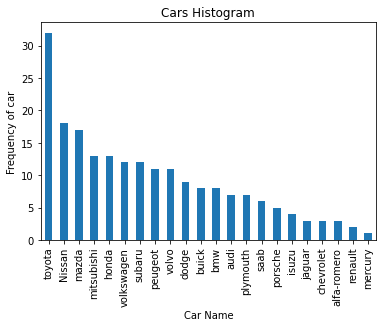

In [268]:
plt1 = df.CarName.value_counts().plot(kind='bar')
plt.title('Cars Histogram')
plt1.set(xlabel = 'Car Name', ylabel='Frequency of car')


We can see that Toyota is very in demand

### Top 10 Cars

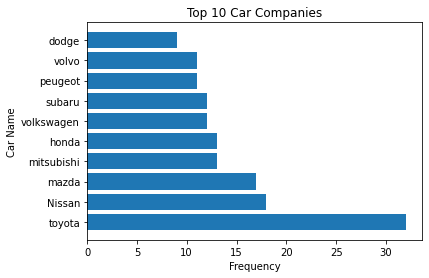

In [269]:
car_counts = df['CarName'].value_counts().head(10)
plt.barh(car_counts.index, car_counts.values)
plt.title('Top 10 Car Companies')
plt.xlabel('Frequency')
plt.ylabel('Car Name')
plt.show()


## Fuel Type

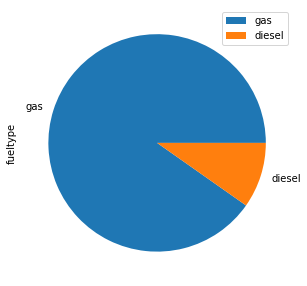

In [270]:
count=pd.DataFrame(df['fueltype'].value_counts())
plot = count.plot.pie(y='fueltype', figsize=(5, 5))

In comparison of diesel with gas. Gas is more consumable

## Car Type

[Text(0.5, 0, 'Car Type'), Text(0, 0.5, 'Frequency of Car type')]

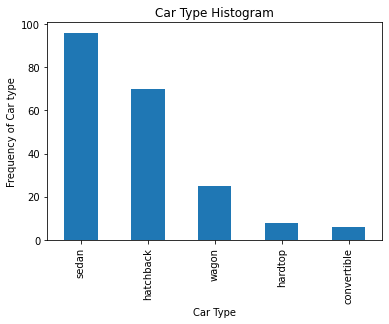

In [271]:
plt1 = df.carbody.value_counts().plot(kind='bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

Cars of type Sedan is indemand

## Engine Type


d:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Engine Type Histogram'}, xlabel='enginetype', ylabel='count'>

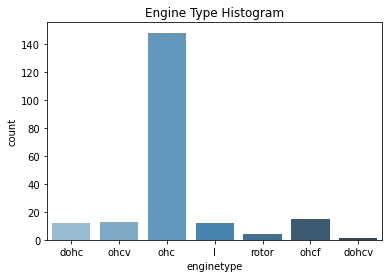

In [272]:
plt.title('Engine Type Histogram')
sns.countplot(df.enginetype, palette=("Blues_d"))

OHC type engine are more used in cars

## Door Numbers

d:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Door Number Histogram'}, xlabel='doornumber', ylabel='count'>

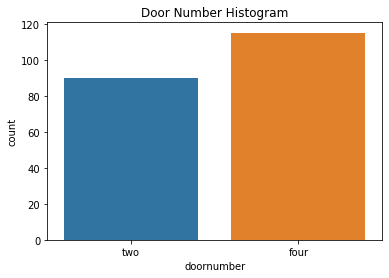

In [273]:
plt.title('Door Number Histogram')
sns.countplot(df.doornumber)

Four doors car are preferable by looking at the graph

## Car Body 

d:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Car Body Histogram'}, xlabel='carbody', ylabel='count'>

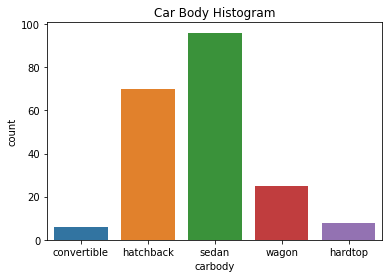

In [274]:
plt.title('Car Body Histogram')
sns.countplot(df.carbody)

Sedan car body is highly in demand


## Drive Wheel

d:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Drive Wheel Histogram'}, xlabel='drivewheel', ylabel='count'>

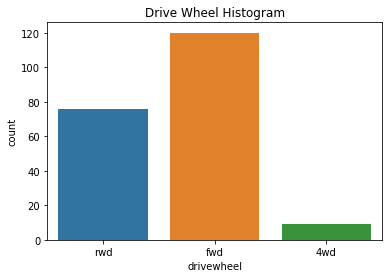

In [275]:
plt.title('Drive Wheel Histogram')
sns.countplot(df.drivewheel)

More people prefer forward drive wheel

## Cylinder Number

d:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Cylinder Number Histogram'}, xlabel='cylindernumber', ylabel='count'>

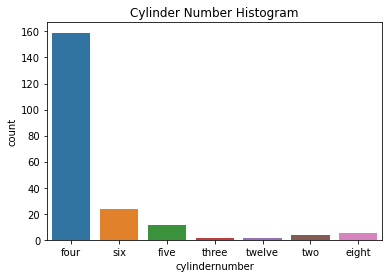

In [276]:
plt.title('Cylinder Number Histogram')
sns.countplot(df.cylindernumber)

The count of four cylinder number is in demand

## Fuel System Histogram

d:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Fuel System Histogram'}, xlabel='fuelsystem', ylabel='count'>

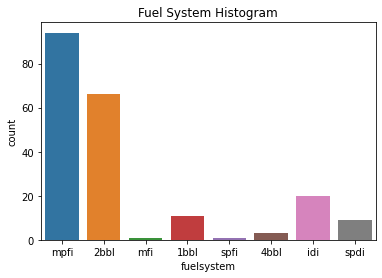

In [277]:
plt.title('Fuel System Histogram')
sns.countplot(df.fuelsystem)

MPFI fuel system is present in most of the cars

# Categorical Features wrt Price


## Fuel Type vs Average Price

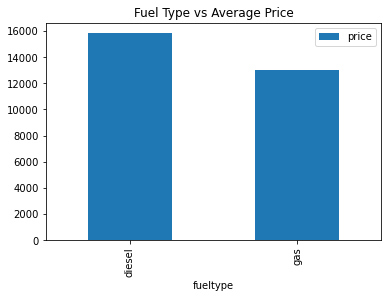

In [278]:
df1 = pd.DataFrame(df.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df1.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

Cars having fuel type Diesel are expensive than gas

## Car Name vs Average Price

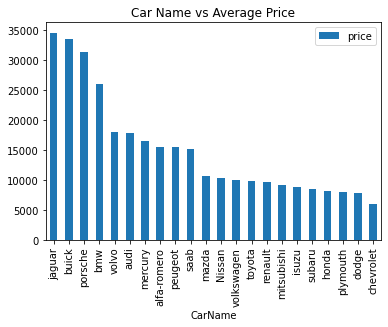

In [279]:
df2 = pd.DataFrame(df.groupby(['CarName'])['price'].mean().sort_values(ascending=False))
df2.plot.bar()
plt.title('Car Name vs Average Price')
plt.show()

The most expensive car is Jaguar while you can get nissan in cheap rates

## Car Type vs Average Price

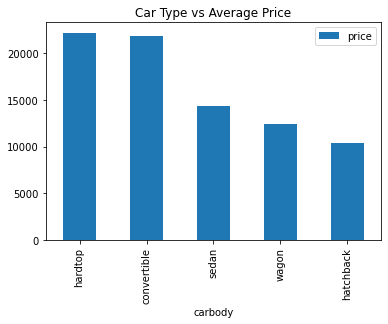

In [280]:
df = pd.DataFrame(df.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()


Hardtop is exoensive than other car types

## Engine Type vs Price

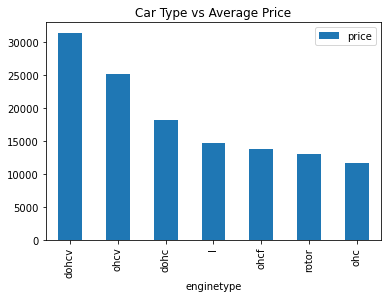

In [283]:
df = pd.DataFrame(df.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

Crs having DOHCV engine type are more likely to be expensive than others

## Door Number vs Price

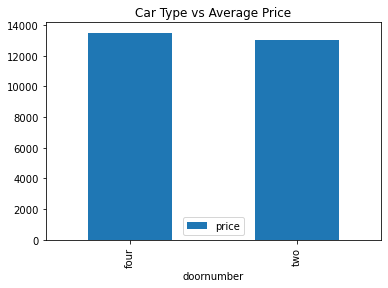

In [ ]:
df = pd.DataFrame(df.groupby(['doornumber'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

Car rates are likely same in both door types

## Car Body vs Average Price

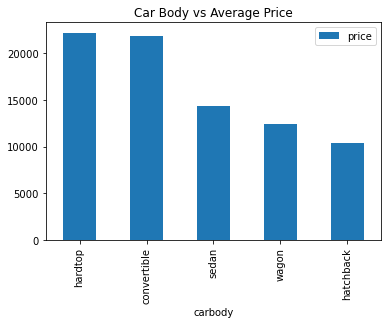

In [ ]:
df = pd.DataFrame(df.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Body vs Average Price')
plt.show()

Hardtop body type is expensive

## Drive wheel vs Average Price

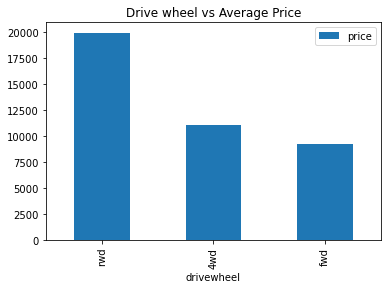

In [ ]:
df = pd.DataFrame(df.groupby(['drivewheel'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Drive wheel vs Average Price')
plt.show()

Cars having RWD drive wheel is more expensive than other 

## Cylinder Number vs Average Price

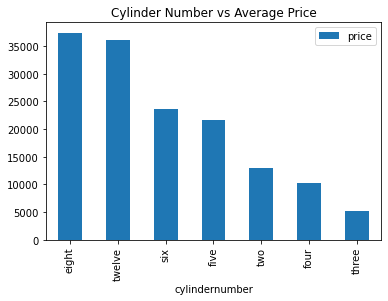

In [ ]:
df = pd.DataFrame(df.groupby(['cylindernumber'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Cylinder Number vs Average Price')
plt.show()

If your car have eight cylinders than it will be expensive

## Fuel System vs Average Price

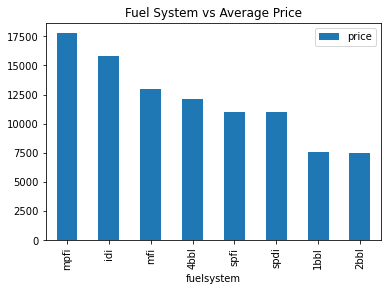

In [ ]:
df = pd.DataFrame(df.groupby(['fuelsystem'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel System vs Average Price')
plt.show()

MPFI fuel type is expensive

# Visualization of Numerical Features

In [ ]:
numerical_cols

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

## Car length vs Price

Text(0.5, 0, 'carlength')

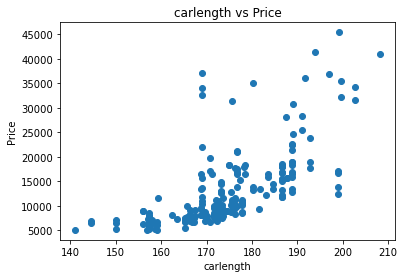

In [ ]:
plt.scatter(df['carlength'],df['price'])
plt.title('carlength vs Price')
plt.ylabel('Price')
plt.xlabel('carlength')

carlength shows positive correlation with price

## Car width vs Price

Text(0.5, 0, 'carwidth')

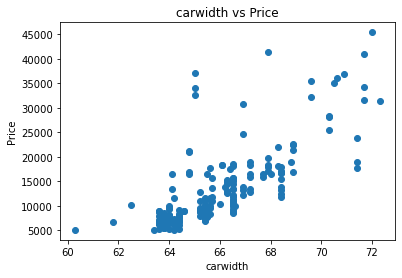

In [ ]:
plt.scatter(df['carwidth'],df['price'])
plt.title('carwidth vs Price')
plt.ylabel('Price')
plt.xlabel('carwidth')

carwidth shows positive correlation with price

## Car height vs Price

Text(0.5, 0, 'carheight')

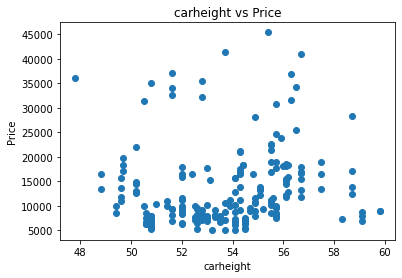

In [ ]:
plt.scatter(df['carheight'],df['price'])
plt.title('carheight vs Price')
plt.ylabel('Price')
plt.xlabel('carheight')

Car height is not showing any significant trend

## Curb weight vs Price

Text(0.5, 0, 'curbweight')

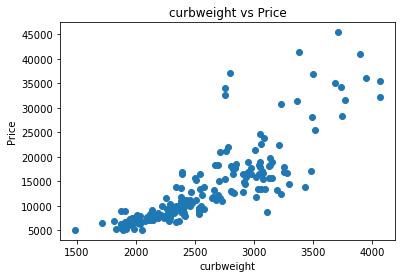

In [ ]:
plt.scatter(df['curbweight'],df['price'])
plt.title('curbweight vs Price')
plt.ylabel('Price')
plt.xlabel('curbweight')

curb weight shows positive correlation with price

## Engine size vs Price

Text(0.5, 0, 'enginesize')

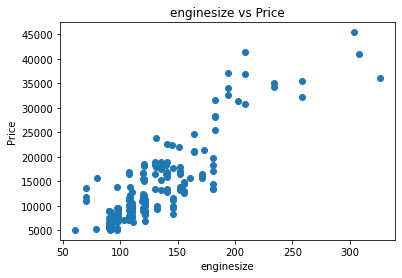

In [ ]:
plt.scatter(df['enginesize'],df['price'])
plt.title('enginesize vs Price')
plt.ylabel('Price')
plt.xlabel('enginesize')

Engine size shows positive correlation with price

## Boreratio vs Price

Text(0.5, 0, 'boreratio')

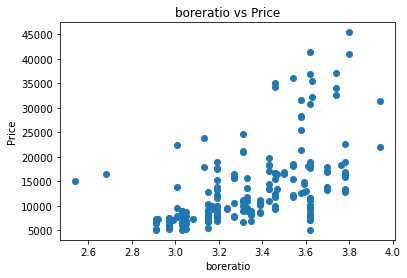

In [ ]:
plt.scatter(df['boreratio'],df['price'])
plt.title('boreratio vs Price')
plt.ylabel('Price')
plt.xlabel('boreratio')

Boreratio shows positive correlation with price

## Stroke vs Price

Text(0.5, 0, 'stroke')

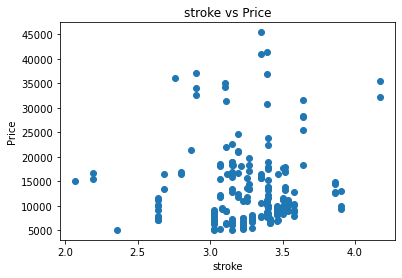

In [ ]:
plt.scatter(df['stroke'],df['price'])
plt.title('stroke vs Price')
plt.ylabel('Price')
plt.xlabel('stroke')

Does not showing any significant trend

## Compression ratio vs Price

Text(0.5, 0, 'compressionratio')

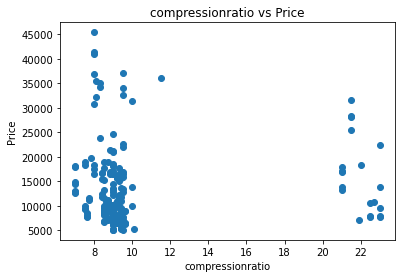

In [ ]:
plt.scatter(df['compressionratio'],df['price'])
plt.title('compressionratio vs Price')
plt.ylabel('Price')
plt.xlabel('compressionratio')

## Horsepower vs Price

Text(0.5, 0, 'horsepower')

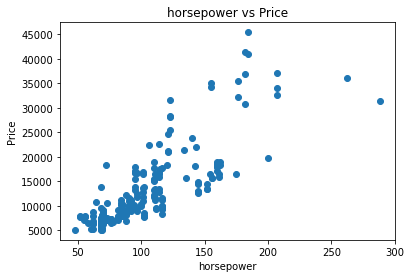

In [ ]:
plt.scatter(df['horsepower'],df['price'])
plt.title('horsepower vs Price')
plt.ylabel('Price')
plt.xlabel('horsepower')

Horsepower shows positive correlation with price

## Peakrpm vs Price

Text(0.5, 0, 'peakrpm')

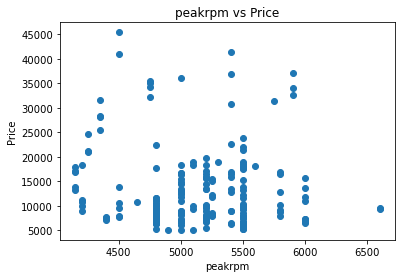

In [ ]:
plt.scatter(df['peakrpm'],df['price'])
plt.title('peakrpm vs Price')
plt.ylabel('Price')
plt.xlabel('peakrpm')

## Citympg vs Price

Text(0.5, 0, 'citympg')

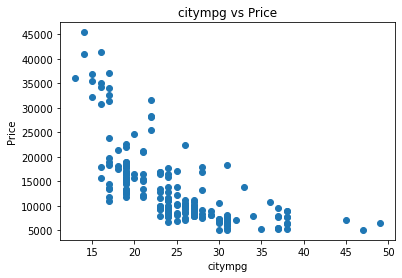

In [ ]:
plt.scatter(df['citympg'],df['price'])
plt.title('citympg vs Price')
plt.ylabel('Price')
plt.xlabel('citympg')

city mpg shows negative correlation with price

## Highwaympg vs Price

Text(0.5, 0, 'highwaympg')

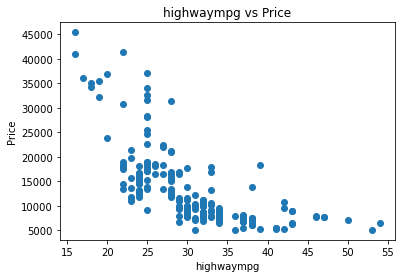

In [ ]:
plt.scatter(df['highwaympg'],df['price'])
plt.title('highwaympg vs Price')
plt.ylabel('Price')
plt.xlabel('highwaympg')

Highway mpg shows negative correlation with price

<AxesSubplot:>

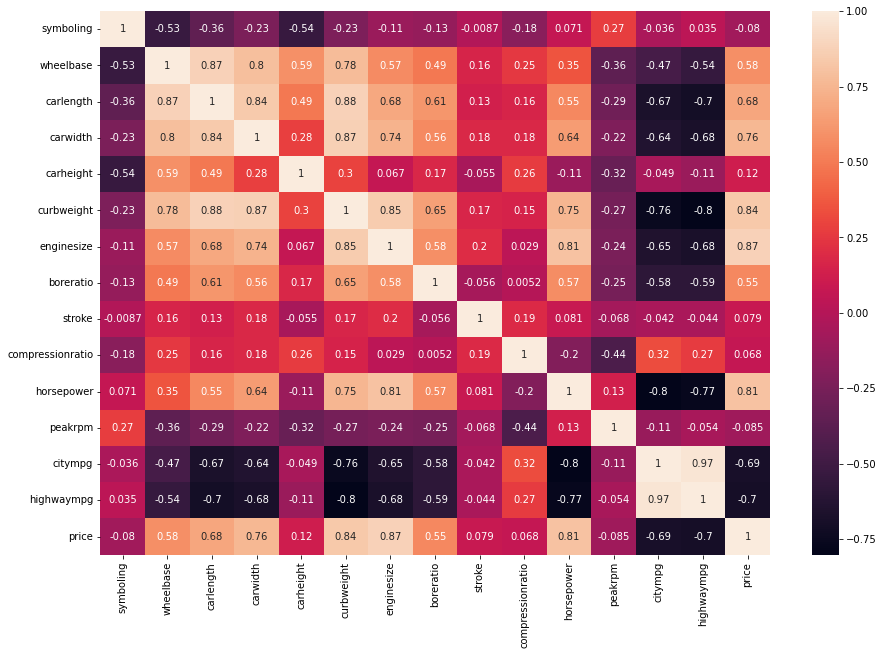

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df[numerical_cols].corr(), annot= True)

In [ ]:
df[numerical_cols].corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


After visualizing and analysing all the information. Here is the list of parameters which are important 
1. Car Range 
2. Engine Type 
3. Fuel type 
4. Car Body 
5. Aspiration 
6. Cylinder Number 
7. Drivewheel 
8. Curbweight 
9. Car Length
10. Car width
11. Engine Size 
12. Boreratio 
13. Horse Power 
14. Wheel base 
15. Fuel Economy

## Making new data set for significant variables

In [ ]:
new_df = df[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase','curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 'carlength','carwidth']]

In [ ]:
new_df.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,carlength,carwidth
0,13495.0,gas,std,convertible,rwd,88.6,2548.0,dohc,four,130.0,3.47,111.0,168.8,64.1
1,16500.0,gas,std,convertible,rwd,88.6,2548.0,dohc,four,130.0,3.47,111.0,168.8,64.1
2,16500.0,gas,std,hatchback,rwd,94.5,2823.0,ohcv,six,152.0,2.68,154.0,171.2,65.5
3,13950.0,gas,std,sedan,fwd,99.8,2337.0,ohc,four,109.0,3.19,102.0,176.6,66.2
4,17450.0,gas,std,sedan,4wd,99.4,2824.0,ohc,five,136.0,3.19,115.0,176.6,66.4


In [ ]:
new_df.shape

(205, 14)

## Converting Objects into Int

In [ ]:
from sklearn.preprocessing import LabelEncoder

columns = new_df.columns
for col in columns:
    if new_df[col].dtype == object:
        enc = LabelEncoder()
        new_df[col] = enc.fit_transform(df[col])


C:\Users\HABIB_~1\AppData\Local\Temp/ipykernel_7508/1161677464.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[col] = enc.fit_transform(df[col])


In [ ]:
new_df.dtypes

price             float64
fueltype            int64
aspiration          int64
carbody             int64
drivewheel          int64
wheelbase         float64
curbweight        float64
enginetype          int64
cylindernumber      int64
enginesize        float64
boreratio         float64
horsepower        float64
carlength         float64
carwidth          float64
dtype: object

In [ ]:
new_df.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,carlength,carwidth
0,13495.0,1,0,0,2,88.6,2548.0,0,2,130.0,3.47,111.0,168.8,64.1
1,16500.0,1,0,0,2,88.6,2548.0,0,2,130.0,3.47,111.0,168.8,64.1
2,16500.0,1,0,2,2,94.5,2823.0,5,3,152.0,2.68,154.0,171.2,65.5
3,13950.0,1,0,3,1,99.8,2337.0,3,2,109.0,3.19,102.0,176.6,66.2
4,17450.0,1,0,3,0,99.4,2824.0,3,1,136.0,3.19,115.0,176.6,66.4


## Heat Map of all significant features

<AxesSubplot:>

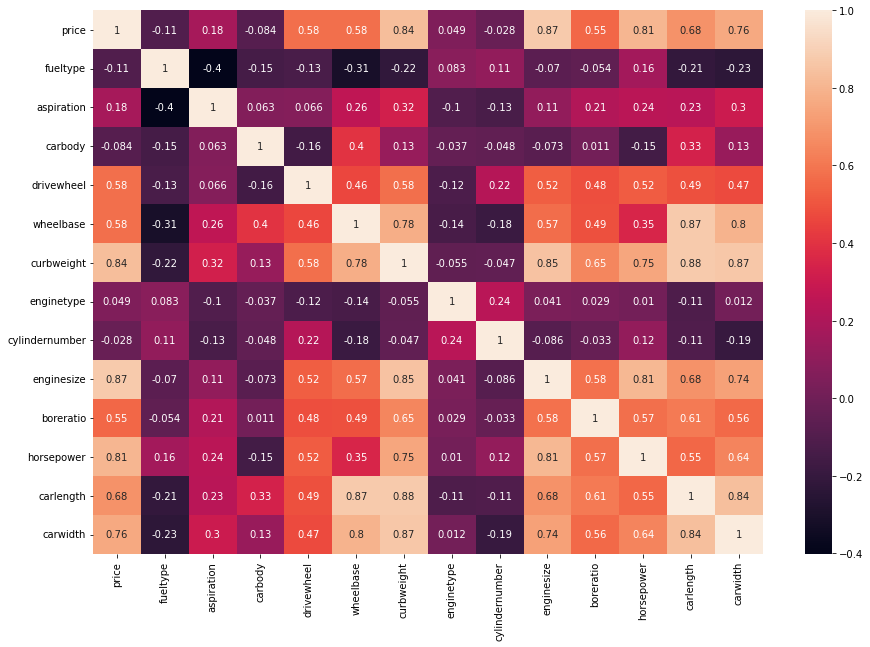

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(new_df.corr(), annot= True)

In [ ]:
X= new_df.drop(columns= ['price'])
Y= df['price']

In [ ]:
X

,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,carlength,carwidth
0,1,0,0,2,88.6,2548.0,0,2,130.0,3.47,111.0,168.8,64.1
1,1,0,0,2,88.6,2548.0,0,2,130.0,3.47,111.0,168.8,64.1
2,1,0,2,2,94.5,2823.0,5,3,152.0,2.68,154.0,171.2,65.5
3,1,0,3,1,99.8,2337.0,3,2,109.0,3.19,102.0,176.6,66.2
4,1,0,3,0,99.4,2824.0,3,1,136.0,3.19,115.0,176.6,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,3,2,109.1,2952.0,3,2,141.0,3.78,114.0,188.8,68.9
201,1,1,3,2,109.1,3049.0,3,2,141.0,3.78,160.0,188.8,68.8
202,1,0,3,2,109.1,3012.0,5,3,173.0,3.58,134.0,188.8,68.9
203,0,1,3,2,109.1,3217.0,3,3,145.0,3.01,106.0,188.8,68.9


In [ ]:
Y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

## Splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=9)

In [ ]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((143, 13), (62, 13), (143,), (62,))

## Model Building

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression().fit(x_train,y_train)

In [ ]:
print("Intercept:" , lr.intercept_)
print("Slope:",lr.coef_)

Intercept: -19690.09272666336
Slope: [-3.31989033e+03 -1.75585042e+03 -1.10481699e+03  7.77312443e+02
  1.89362880e+02  2.47089171e+00  6.49599112e+02 -7.78641710e+02
  5.09151293e+01 -1.62704391e+03  8.78583846e+01  4.08954748e+01
 -6.84838368e+01]


In [ ]:
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)
lr.score(x_test,y_test)

0.8837667543142406